# IMPORT LIBRARIES

In [39]:
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models,layers,optimizers,utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# LOADING DATASET

In [53]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [54]:
print(len(train_data))
print(len(test_data))

8982
2246


In [42]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

# PREPARING THE DATA 

In [55]:
#def vectorize_sequences(sequences,dimension=10000):
#    results=np.zeros((len(sequences),dimension))
#    for i, sequence in enumerate(sequences):
#        results[i,sequence]=1.
#    return results

def Vectorize_sequences(sequences,dimension=10000): #sequence jo ha train data hai or dimension 10k is liye ha q k is bara num 
#nai or neural network specific size input leta ha or specific output produc krta ha
    result=np.zeros((len(sequences),dimension)) #two dimension array bana rahe hain
    for i,sequence in enumerate(sequences): #enumerate hamein index or value return krta ha
        result[i,sequence]=1.
    return result

In [56]:
train_data=Vectorize_sequences(train_data)
test_data=Vectorize_sequences(test_data)


In [45]:
#onehotencode
# class A B C usmy A B C rows and A B C columns jahan py bhi jo cheez class A sy belong
#krti khali A PY ONE BAQI HAR JAGA ZERO
# SAME PROCEDURE FOR B AND C JO CHEEZ JIS CLASS SY BELONG KRTI KHALI WAHEEN 1 AYEGA BAQI HAR JAGA 0
#UTILS NAME WALI LIBRARY ONEHOTENCODING KI

In [57]:
#function bana kr onehotencoding wala kam
#def one_hot(labels,dimension=46):
#    results=np.zeros((len(labels),dimension))
#    for i, labels in enumerate(labels):
#        results[i,labels]=1.
#    return results
#function mein label jayengy and dimension. dimension number of columns
#then array banaya zeros ka jismy rows mein labels and columns mein dimension jayengi
#loop ki condition labels mein labels jayengy and i mein index
#i mein us index py jo label ha 1 2 jo bhi ha tw us perticular column ko 1 kardega baqi ko 0
def to_one_hot(labels,dimension=46): 
    result=np.zeros((len(labels),dimension)) 
    for i,labels in enumerate(labels): 
        result[i,labels]=1.
    return result

In [58]:

one_hot_train_label=to_one_hot(train_labels)
one_hot_test_label=to_one_hot(test_labels)



# OR

In [48]:
#same kam jo uper function bana kr kiya ha wohi is library sy bhi hoskta is trhn
#one_hot_train_labels=utils.to_categorical(train_labels)
#one_hot_train_labels=utils.to_categorical(test_labels)

In [59]:
#x_val=x_train[:1000]
#partial_x_train=train_data[1000:]
#start k 1  hazar kr x_val mein jarhy hyn baqi k 1hazar k badd sy partial_x_train mein jarhy hyn yh input k liye 
#validation wala kam
#y_val=one_hot_train_labels[:1000]
#partial_y_train=one_hot_train_labels[1000:]
#yh output k liye same kam 


x_val=train_data[:1000] #totl 40k hain jisme se validation me 10k ja rahe hain
partial_x_train=train_data[1000:] #or baki partial me ja rahe ha
y_val=one_hot_train_label[:1000]
partial_y_train=one_hot_train_label[1000:]


# NETWORK BUILDING

In [60]:
#model=models.Sequential()
#model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
#model.add(layers.Dense(64,activation='relu'))
#model.add(layers.Dense(46,activation='softmax'))
#reuters mein 46 class hyn tbhi output mein 46 output 
#softmax probablity wala scene jiski sbsy ziada property hu wh output


model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

# COMPILATION STEP

In [61]:
#multiclass k liye categorical cross entropy
#model.compile(optimizer='rmsprop',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])


model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [62]:
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))
#history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 7s 822us/sample - loss: 2.5574 - accuracy: 0.5266 - val_loss: 1.6856 - val_accuracy: 0.6530
Epoch 2/20
7982/7982 [==============================] - 2s 311us/sample - loss: 1.3738 - accuracy: 0.7096 - val_loss: 1.2715 - val_accuracy: 0.7160
Epoch 3/20
7982/7982 [==============================] - 1s 170us/sample - loss: 1.0212 - accuracy: 0.7762 - val_loss: 1.1121 - val_accuracy: 0.7540
Epoch 4/20
7982/7982 [==============================] - 1s 182us/sample - loss: 0.8029 - accuracy: 0.8271 - val_loss: 1.0159 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 1s 159us/sample - loss: 0.6365 - accuracy: 0.8673 - val_loss: 0.9544 - val_accuracy: 0.7880
Epoch 6/20
7982/7982 [==============================] - 1s 162us/sample - loss: 0.5064 - accuracy: 0.8979 - val_loss: 0.9055 - val_accuracy: 0.7970
Epoch 7/20
7982/7982 [==============================] - 1s 157us

In [ ]:
print(len(train_data))

In [ ]:
print(len(train_labels))

In [ ]:
print(len(test_data))

In [35]:
print(len(test_labels))

2246


# Step :Plot Graph(Visualization of Data)

In [64]:
history_dict=history.history #ye hr epochs me kitna loss or acccuracy wo sb btata ha
print(history_dict)

{'loss': [2.5573855200019344, 1.373751515256107, 1.0212496619749056, 0.8029070891135619, 0.6364732486536795, 0.5063771389310924, 0.4093637129502379, 0.3345155568610932, 0.2772581608813378, 0.2334227876551496, 0.20445336364499014, 0.17823062758716357, 0.16259189543718683, 0.14472321659304152, 0.1411259399227139, 0.12654431128421245, 0.12414659782814759, 0.12053496631964261, 0.11729373584427472, 0.11160128819213658], 'accuracy': [0.52655977, 0.7095966, 0.77624655, 0.827111, 0.8673265, 0.8978953, 0.91480833, 0.92896515, 0.9396141, 0.9467552, 0.94926083, 0.95114005, 0.9538963, 0.9540216, 0.9540216, 0.9575294, 0.95665246, 0.9571536, 0.95727885, 0.95828116], 'val_loss': [1.6855937423706056, 1.271474328994751, 1.1121355934143067, 1.0158937740325928, 0.9544083099365235, 0.9055418634414673, 0.9015713720321655, 0.929551552772522, 0.8941231565475464, 0.8996589341163636, 0.9201027030944824, 0.9206310353279114, 0.9727616748809814, 1.0462401323318482, 1.0351315546035766, 1.0715986261367798, 1.036986

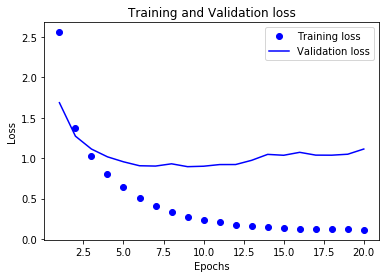

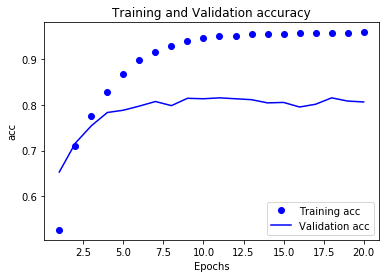

<function matplotlib.pyplot.clf()>

In [65]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.clf

# final model predict

In [66]:
prediction=model.predict(test_data)
prediction

array([[7.9458340e-07, 1.6082345e-06, 8.3971607e-08, ..., 5.9704682e-08,
        9.3383135e-11, 2.0942239e-09],
       [2.4662184e-04, 6.7626417e-01, 3.6918204e-06, ..., 1.1340838e-07,
        1.4637618e-10, 4.2875186e-08],
       [3.8135934e-04, 9.4276512e-01, 1.3468878e-03, ..., 5.0720020e-05,
        2.3725632e-07, 1.2766939e-06],
       ...,
       [1.6058947e-06, 5.9362064e-06, 2.8424040e-07, ..., 3.8386547e-06,
        3.4630535e-10, 4.1048236e-09],
       [7.7244379e-03, 3.4786004e-01, 6.7931012e-04, ..., 6.8948772e-05,
        7.7678187e-06, 8.7040054e-05],
       [1.3138550e-04, 9.3174458e-01, 2.7961559e-03, ..., 9.8537297e-05,
        1.7745197e-07, 2.0876502e-08]], dtype=float32)

In [67]:
prediction.shape

(2246, 46)

In [68]:
prediction[0].sum()

0.9999999

# Alternating Approach For Labels Instead of one hot encoding

In [69]:
train_label=np.array(train_labels)
test_label=np.array(test_labels)

In [70]:
model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [71]:
history=model.fit(train_data,train_label,epochs=20,batch_size=512)

Train on 8982 samples
Epoch 1/20
8982/8982 [==============================] - 2s 275us/sample - loss: 0.2375 - accuracy: 0.9394
Epoch 2/20
8982/8982 [==============================] - 2s 170us/sample - loss: 0.1596 - accuracy: 0.9488
Epoch 3/20
8982/8982 [==============================] - 1s 148us/sample - loss: 0.1390 - accuracy: 0.9522
Epoch 4/20
8982/8982 [==============================] - 1s 162us/sample - loss: 0.1271 - accuracy: 0.9536
Epoch 5/20
8982/8982 [==============================] - 1s 137us/sample - loss: 0.1236 - accuracy: 0.9536
Epoch 6/20
8982/8982 [==============================] - 1s 127us/sample - loss: 0.1185 - accuracy: 0.9547
Epoch 7/20
8982/8982 [==============================] - 1s 164us/sample - loss: 0.1121 - accuracy: 0.9561
Epoch 8/20
8982/8982 [==============================] - 1s 167us/sample - loss: 0.1098 - accuracy: 0.9566
Epoch 9/20
8982/8982 [==============================] - 1s 148us/sample - loss: 0.1059 - accuracy: 0.9556
Epoch 10/20
8982/8982 [=

In [72]:
prediction=model.predict(test_data)
prediction

array([[2.4661807e-07, 3.6010448e-07, 1.6307945e-08, ..., 5.6811689e-10,
        4.4991807e-15, 4.0032175e-12],
       [6.9317197e-05, 8.8529974e-01, 2.3126047e-05, ..., 5.2346766e-11,
        6.9638102e-14, 4.9691906e-08],
       [4.2271087e-05, 9.6958464e-01, 6.7385164e-04, ..., 9.9313706e-07,
        1.1924459e-11, 4.1810018e-09],
       ...,
       [2.0758050e-07, 4.4982385e-06, 6.5575398e-09, ..., 7.0916663e-08,
        6.3921135e-16, 7.1381139e-13],
       [4.8529920e-03, 2.2138904e-01, 1.0767070e-04, ..., 1.3532313e-06,
        1.0723537e-08, 1.1787818e-06],
       [3.3284642e-04, 2.0805870e-01, 2.0931814e-02, ..., 8.1128077e-05,
        6.9607059e-10, 7.3960673e-09]], dtype=float32)

In [73]:
prediction.shape

(2246, 46)

In [74]:
prediction[0].sum()

0.99999994